In [34]:
import pandas as pd
import ipywidgets as widgets

In [35]:
readers = pd.read_csv('readers.csv')
orders = pd.read_csv('orders.csv')

data = orders.merge(readers)

data['reader_full_name'] = data['reader_name'] + ' ' + data['reader_surname']

data

,reader_id,book_author,book_title,book_genre,reader_name,reader_surname,reader_full_name
0,1,J.K. Rowling,Harry Potter and the Philosopher's Stone,Fantasy,John,Smith,John Smith
1,1,J.K. Rowling,Harry Potter and the Chamber of Secrets,Fantasy,John,Smith,John Smith
2,1,Ernest Hemingway,The Old Man and the Sea,Adventure,John,Smith,John Smith
3,1,Charlotte Brontë,Jane Eyre,Romance,John,Smith,John Smith
4,1,Charles Dickens,Great Expectations,Classic,John,Smith,John Smith
5,2,George Orwell,1984,Dystopian,Jack,Bruce,Jack Bruce
6,2,F. Scott Fitzgerald,The Great Gatsby,Classic,Jack,Bruce,Jack Bruce
7,2,Aldous Huxley,Brave New World,Science Fiction,Jack,Bruce,Jack Bruce
8,2,Mary Shelley,Frankenstein,Horror,Jack,Bruce,Jack Bruce
9,3,Jane Austen,Pride and Prejudice,Romance,Alice,Lee,Alice Lee


In [42]:
def get_reader_orders(full_name):
    reader_orders = data[data['reader_full_name'] == full_name]
    reader_authors = reader_orders.groupby('book_author').apply(lambda group: pd.Series({
        'number_of_books_from_author': group['book_title'].count()
    }))

    return reader_authors


widgets.interact_manual(get_reader_orders, full_name=widgets.Dropdown(options=data['reader_full_name'].unique()))

interactive(children=(Dropdown(description='full_name', options=('John Smith', 'Jack Bruce', 'Alice Lee', 'Mar…

<function __main__.get_reader_orders(full_name)>

In [37]:
readers_rating = data.groupby(['reader_id', 'reader_name', 'reader_surname', 'reader_full_name']).apply(lambda reader_orders: pd.Series({
    'number_of_books': reader_orders['book_title'].count()
})).reset_index().sort_values('number_of_books', ascending=False)

readers_rating

,reader_id,reader_name,reader_surname,reader_full_name,number_of_books
0,1,John,Smith,John Smith,5
1,2,Jack,Bruce,Jack Bruce,4
2,3,Alice,Lee,Alice Lee,4
3,4,Mary,Parker,Mary Parker,4
4,5,Joe,Brown,Joe Brown,4


<Axes: xlabel='Reader full name', ylabel='Number of books ordered'>

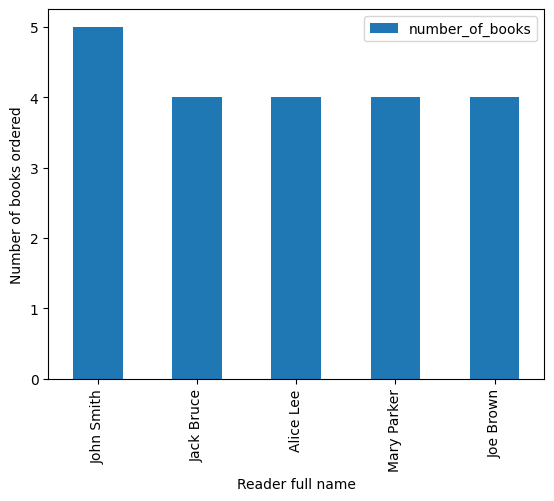

In [38]:
readers_rating.plot(kind='bar', xlabel='Reader full name', ylabel='Number of books ordered', x='reader_full_name', y='number_of_books')

In [41]:
book_orders = data.groupby(['book_title', 'book_author']).apply(lambda book: pd.Series({
    'number_of_orders': book['book_title'].count()
})).reset_index().sort_values('number_of_orders', ascending=False)
book_orders

,book_title,book_author,number_of_orders
15,The Great Gatsby,F. Scott Fitzgerald,2
0,1984,George Orwell,1
1,A Game of Thrones,George R.R. Martin,1
18,To Kill a Mockingbird,Harper Lee,1
17,The Old Man and the Sea,Ernest Hemingway,1
16,The Lord of the Rings,J.R.R. Tolkien,1
14,The Adventures of Tom Sawyer,Mark Twain,1
13,Sherlock Holmes: The Hound of the Baskervilles,Arthur Conan Doyle,1
12,Pride and Prejudice,Jane Austen,1
11,Murder on the Orient Express,Agatha Christie,1
